# Total Iron (Fe) Concentration Determination in a Lagoon treating Mine Drainage

This project aims to identify chemical parameters that can successfully predict Total Fe from the outlet of a Passive Mine Water Treatment Scheme (MWTS) lagoon receiving mine water. A MWTS is designed to reduce total iron in the mine water, and since the mine water contains other chemical elemnets asides Fe, it is possible for the Fe content to be influenced  and determined by the other elements. Therefore, this project was carried out to determine the relationship between Fe and the other elements at the outlet of the lagoon. 

## 1. Import Libraries and Dataset

In [75]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from IPython.display import HTML
import base64,io
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None  # default='warn'
warnings.filterwarnings('ignore')
%matplotlib inline

In [76]:
# The code was removed by Watson Studio for sharing.

,sample ID from UKAS Lab,sample ID,date of collection,date of collection.1,Time,location,pH units w,Conductivity uS/cm @ 25C w,Suspended Solids w,Total Alkalinity as CaCO3 w,Chloride as Cl w,Total Sulphur as SO4 (Dissolved) a,Calcium as Ca (Dissolved) a,Magnesium as Mg (Dissolved) a,Sodium as Na (Dissolved) a,Potassium as K (Dissolved) a,Manganese as Mn (Total) a,Iron as Fe (Total) a,Iron as Fe (Dissolved) a,Aluminium as Al (Total) a,Ferrous Iron as Fe(2+),Iron as Fe:(Total),Ammoniacal Nitrogen as N
0,EX/2041614,L1O12021,12/02,2020-02-12,12:35:00,OUT,7.3,20200,42,412,5780,2670,359,655,3570,147,2.18,20.9,20.7,0.01,7.90,25.1,2.3
1,EX/2041616,L1O12022,12/02,2020-02-12,16:10:00,OUT,7.3,20200,33,421,5880,2660,354,657,3590,148,2.25,20.1,19.7,0.01,6.56,24.4,2.3
2,EX/2041618,L1O13021,13/02,2020-02-13,12:25:00,OUT,7.1,20000,48,419,5840,2600,359,639,3480,151,2.26,26.9,28.2,0.01,13.80,26.8,2.3
3,EX/2041620,L1O13022,13/02,2020-02-13,13:35:00,OUT,7.1,20000,42,408,5860,2940,356,721,3930,151,2.30,21.2,20.9,0.01,12.40,25.3,2.3
4,EX/2042851,L1O19021,19/02,2020-02-19,12:00:00,OUT,7.1,19400,60,429,5530,2670,353,655,3500,142,2.21,37.9,16.0,0.01,21.20,32.2,2.3


## 2. Data Exploration

In [77]:
#rename columns
df_data.rename(columns={"sample ID from UKAS Lab":"labsample_ID",
                        "sample ID":"sample_id",
                        "date of collection.1":"date",
                        "pH units w":"pH",
                        "Conductivity uS/cm @ 25C w":"Conductivity",
                        "Suspended Solids w":"SS",
                        "Total Alkalinity as CaCO3 w":"Alkalinity",
                        "Chloride as Cl w":"Cl",
                        "Total Sulphur as SO4 (Dissolved) a":"SO4",
                        "Calcium as Ca (Dissolved) a":"Ca",
                        "Magnesium as Mg (Dissolved) a":"Mg",
                        "Sodium as Na (Dissolved) a":"Na",
                        "Potassium as K (Dissolved) a":"K",
                        "Manganese as Mn (Total) a":"Mn",
                        "Aluminium as Al (Total) a":"Al",
                        "Ferrous Iron as Fe(2+)":"Fe2+",
                        "Iron as Fe:(Total)":"Fe",
                        "Ammoniacal Nitrogen as N":"N"}, inplace=True)
                   

In [78]:
#drop columns not needed
df_data.drop(['date of collection','location','Iron as Fe (Total) a','Iron as Fe (Dissolved) a' ], axis=1,inplace=True)
df_data.head()

,labsample_ID,sample_id,date,Time,pH,Conductivity,SS,Alkalinity,Cl,SO4,Ca,Mg,Na,K,Mn,Al,Fe2+,Fe,N
0,EX/2041614,L1O12021,2020-02-12,12:35:00,7.3,20200,42,412,5780,2670,359,655,3570,147,2.18,0.01,7.90,25.1,2.3
1,EX/2041616,L1O12022,2020-02-12,16:10:00,7.3,20200,33,421,5880,2660,354,657,3590,148,2.25,0.01,6.56,24.4,2.3
2,EX/2041618,L1O13021,2020-02-13,12:25:00,7.1,20000,48,419,5840,2600,359,639,3480,151,2.26,0.01,13.80,26.8,2.3
3,EX/2041620,L1O13022,2020-02-13,13:35:00,7.1,20000,42,408,5860,2940,356,721,3930,151,2.30,0.01,12.40,25.3,2.3
4,EX/2042851,L1O19021,2020-02-19,12:00:00,7.1,19400,60,429,5530,2670,353,655,3500,142,2.21,0.01,21.20,32.2,2.3


In [79]:
#summarize the dataset
df_data.describe()

,pH,Conductivity,SS,Alkalinity,Cl,SO4,Ca,Mg,Na,K,Mn,Al,Fe2+,Fe,N
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,7.096296,19503.703704,49.333333,438.333333,5802.222222,2760.000000,356.777778,673.740741,3675.555556,146.111111,2.247407,0.006667,12.508519,28.540741,2.266667
std,0.148016,321.632233,9.926654,25.875441,208.830688,154.197675,8.906926,39.777837,224.898838,2.591901,0.048484,0.005547,5.124130,3.622394,0.048038
min,6.800000,18900.000000,32.000000,408.000000,5460.000000,2480.000000,342.000000,590.000000,3190.000000,142.000000,2.180000,0.000000,4.760000,23.800000,2.200000
25%,7.000000,19350.000000,42.000000,418.500000,5695.000000,2660.000000,350.000000,653.500000,3570.000000,144.000000,2.215000,0.000000,8.660000,25.800000,2.200000
50%,7.100000,19500.000000,50.000000,429.000000,5790.000000,2730.000000,359.000000,671.000000,3630.000000,146.000000,2.250000,0.010000,12.400000,26.900000,2.300000
75%,7.200000,19600.000000,55.500000,453.000000,5855.000000,2860.000000,362.500000,697.500000,3820.000000,147.500000,2.270000,0.010000,15.450000,30.900000,2.300000
max,7.300000,20200.000000,74.000000,510.000000,6490.000000,3110.000000,373.000000,750.000000,4130.000000,151.000000,2.360000,0.020000,24.900000,36.900000,2.300000


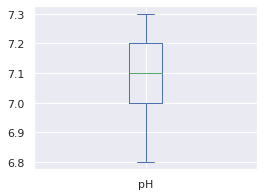

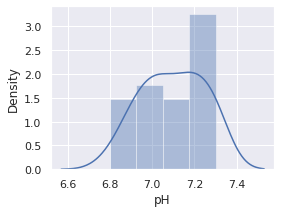

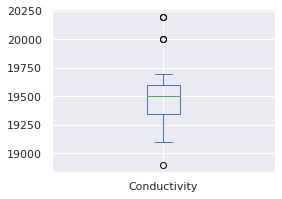

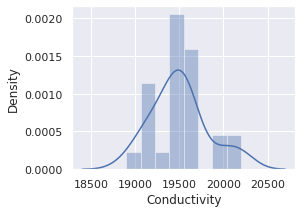

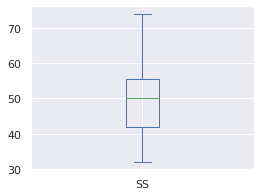

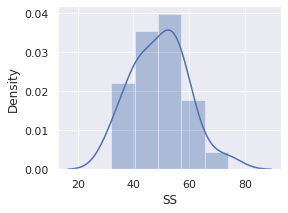

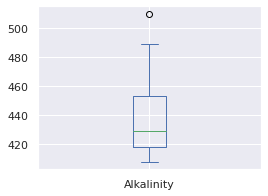

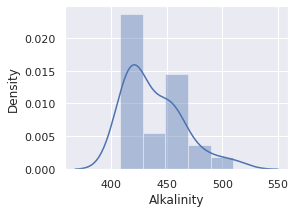

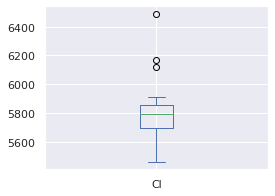

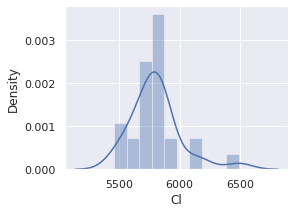

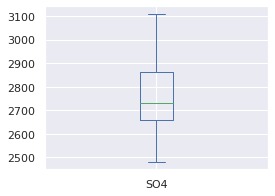

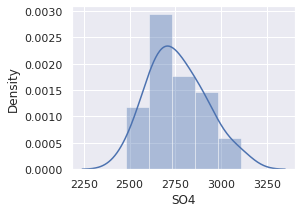

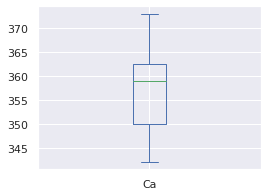

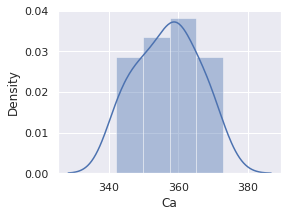

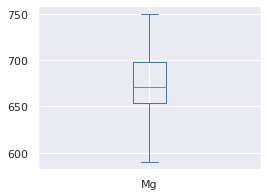

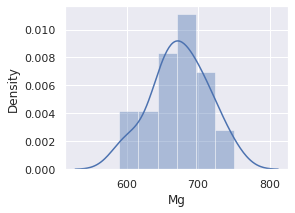

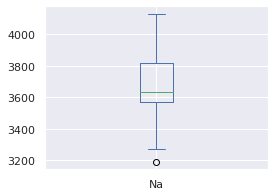

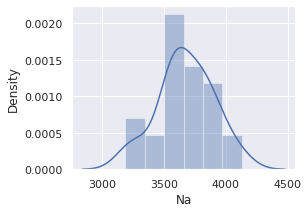

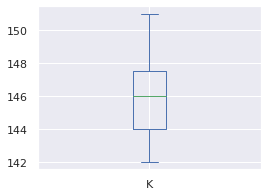

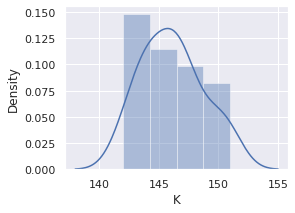

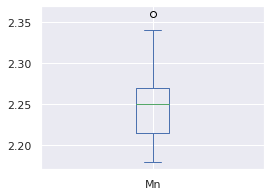

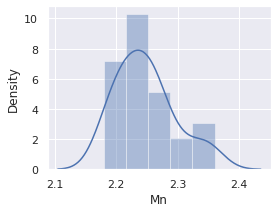

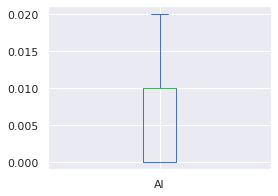

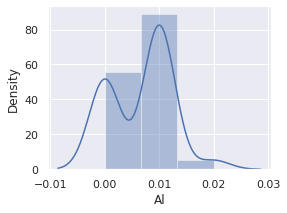

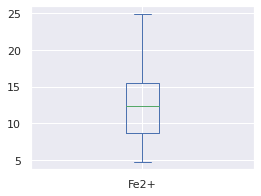

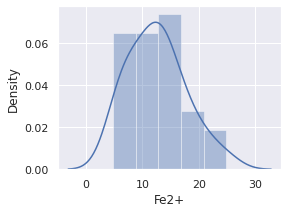

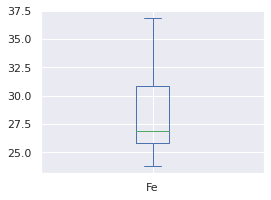

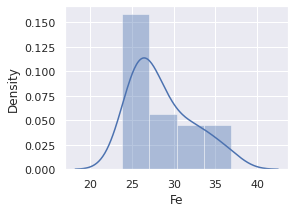

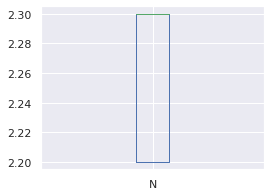

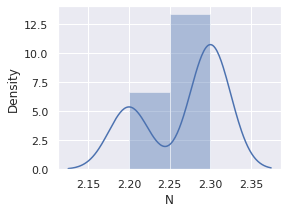

In [80]:
#plot each of the features using distribution plot and box plot
data_list=df_data.describe().columns.to_list()

for x in data_list:
    fig, ax = plt.subplots(1,1, figsize=(4,3))
    df_data[x].plot.box()
    fig2,ax2= plt.subplots(1,1, figsize=(4,3))
    sns.distplot(df_data[x])
        
plt.show()

It can be observed from the box plots that Conductivty and Chloride (Cl) contain some outliers.

### Correlation

In [81]:
#check how well the variable are correlated with each other
df_data.corr().head()

,pH,Conductivity,SS,Alkalinity,Cl,SO4,Ca,Mg,Na,K,Mn,Al,Fe2+,Fe,N
pH,1.000000,0.105326,-0.284453,-0.490729,0.033872,0.097739,0.174393,0.156609,0.038770,-0.089114,-0.296157,0.546519,-0.664516,-0.641722,-0.018030
Conductivity,0.105326,1.000000,-0.258199,-0.350923,0.068016,0.075225,-0.376966,0.177748,0.223557,0.479311,-0.379190,0.114976,0.052675,-0.073421,0.082977
SS,-0.284453,-0.258199,1.000000,0.442630,-0.190732,0.100007,-0.259699,0.077957,0.088897,-0.352791,-0.034896,0.027940,0.527026,0.630147,-0.008066
Alkalinity,-0.490729,-0.350923,0.442630,1.000000,-0.051462,-0.116351,-0.116150,-0.203941,-0.104096,-0.337208,0.330898,-0.514496,0.411637,0.607111,0.411530
Cl,0.033872,0.068016,-0.190732,-0.051462,1.000000,0.518972,-0.145916,0.443822,0.409272,-0.037424,-0.025620,-0.102929,-0.257304,-0.230802,0.069011


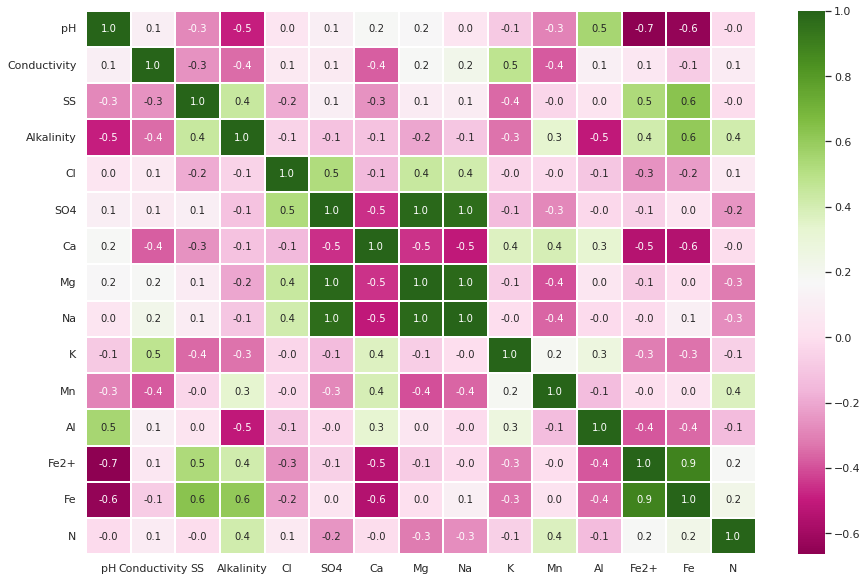

In [82]:
#visualize the correlation

correlation_train = df_data.corr()
sns.set(font_scale=1.0)
plt.figure(figsize=(15, 10))
ax = sns.heatmap(correlation_train, annot=True, annot_kws={'size': 10}, fmt='.1f', cmap='PiYG', linewidths=.2)
plt.show()

Let's go ahead to make individual distribution plots of each variable to visualize how well they are correlated with on another. For ease, let's plot variables with Fe correlation greater than 0.5

#### Select and Visualize variables with Fe correlation >0.5

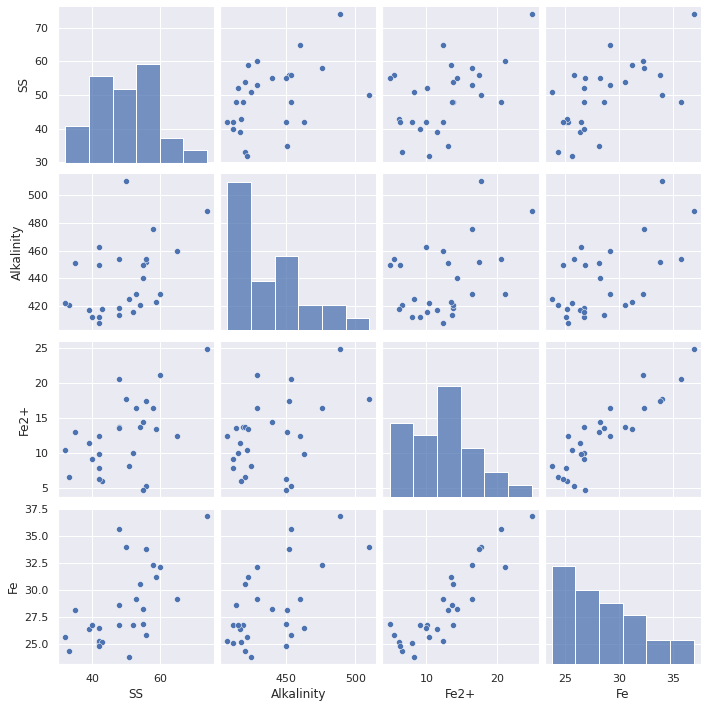

In [83]:
data_corr= df_data.corr()['Fe'].loc[df_data.corr()['Fe']>=0.5].to_frame(name= 'Fe')
#get the list of the index with corr value >0.5
data_list= data_corr.index.tolist()

#plot some of the features to see how linear their relationship is
#seaborn pairplot
sns.set()
pairp = sns.pairplot(df_data[data_list]) #extract this list from the dataset
plt.show()

#### P-Value
Let's confirm that the correlation between these variables is statistically significant. We will choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant. If p-value is < 0.001: we say there is strong evidence that the correlation is significant.

In [84]:
#first create a new dataset with the parameters highly correlated with Fe
new_df= df_data[['SS','Alkalinity','Fe2+', 'Fe']]

#Lets calculate the Pearson Correlation Coefficient and P-value of Fe and Fe2+:
pearson_coef, p_value = stats.pearsonr(new_df['Fe'], new_df['Fe2+'])
print("The Pearson Correlation Coefficient between Fe and Fe2+ is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient between Fe and Fe2+ is 0.887997856569856  with a P-value of P = 6.476570874246205e-10


Since the p-value is < 0.001, the correlation between Fe and Fe2+ is statistically SIGNIFICANT, and the coefficient of ~ 0.89 shows that the relationship is STRONG.

In [85]:
#Lets calculate the Pearson Correlation Coefficient and P-value of Fe and Alkalinity:

pearson_coef, p_value = stats.pearsonr(new_df['Fe'], new_df['Alkalinity'])
print("The Pearson Correlation Coefficient between Fe and Alkalinity is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient between Fe and Alkalinity is 0.6071108044882381  with a P-value of P = 0.0007851696451246459


The p-value is < 0.001, the correlation between Fe and Alkalinty is statistically SIGNIFICANT, and the coefficient of ~ 0.61 shows that the relationship is QUITE STRONG.

In [86]:
#Lets calculate the Pearson Correlation Coefficient and P-value of Fe and SS:
pearson_coef, p_value = stats.pearsonr(new_df['Fe'], new_df['SS'])
print("The Pearson Correlation Coefficient between Fe and SS is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient between Fe and SS is 0.6301467199979037  with a P-value of P = 0.0004271127567978612


Since the p-value is < 0.001, the correlation between Fe and SS is statistically SIGNIFICANT, and the coefficient of ~ 0.63 shows that the relationship is QUITE STRONG.However, the relationship betwen Fe and Fe2+ seems to be the strongest based on the p-value and coefficient. Let's explore further by fitting a simple linear regression model.

## Model Development
### Simple Linear Regression Model

In [87]:
#let's use Fe2+ as a predictor for this Simple L.R since it seems to have the strongest relationship with Fe
#place the target data in a separate dataframe

x=new_df[['Fe2+']]
y= new_df[['Fe']]

#create train (70%) and test(30%) data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=30)

print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (18, 1) (18, 1)
Test set: (9, 1) (9, 1)


Coefficients:  [[0.62524372]]
Intercept:  [20.85092225]


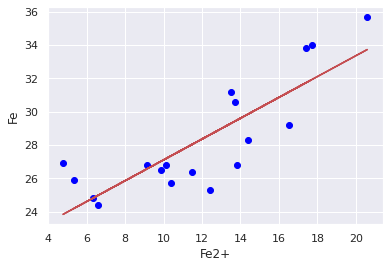

In [88]:
#use sklearn package to model data
regr = linear_model.LinearRegression()
#fit model
regr.fit (x_train, y_train)

#obtain a prediction
y_pred = regr.predict(x_test)

#output the Coefficient and Intercept in the simple L.R which are the parameters of the fit line
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_) 

#proceed to plot fit line over the data 
plt.scatter(x_train, y_train,  color='blue')
plt.plot(x_train, regr.coef_[0][0]*x_train + regr.intercept_[0], '-r')
plt.xlabel("Fe2+")
plt.ylabel("Fe")
plt.show()

Let's also visualize the model using a distribution plot: the distribution of the fitted values that result from the model and compare it to the distribution of the actual values. 

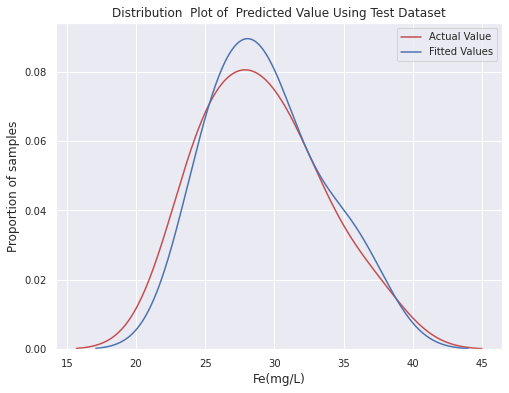

In [89]:
width = 8
height = 6
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color='r', label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Distribution  Plot of  Predicted Value Using Test Dataset', fontsize= 12)
plt.xlabel('Fe(mg/L)', fontsize= 12)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
#plt.ylim([-1.0, 8.0])
plt.legend(loc="upper right", fontsize= 10)
plt.ylabel('Proportion of samples', fontsize= 12)

plt.show()
plt.close()

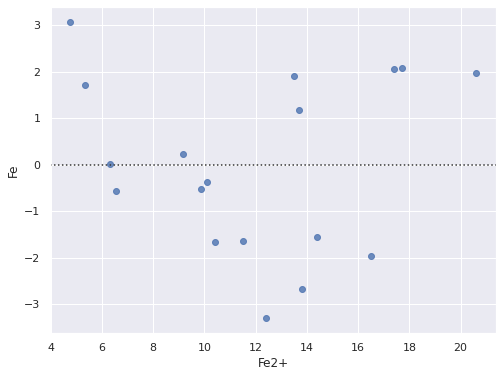

In [90]:
#let's also visualize a residual plot
plt.figure(figsize=(width, height))
sns.residplot(x_train,y_train)
plt.show()

We can see from this residual plot that the residuals are randomly spread around the x-axis, which means that a linear model is appropriate for examining the relationship between Fe and Fe2+ in this dataset. The distribution plot also shows that the predicted Fe concentration values are also quite close to the acutal Fe concentration values in the test dataset. Let's explore the accuracy of our simple linear regression model by obtaining evaluation metrics.

#### Evaluation
Evaluation metrics provide a key role in the development of a regression model, as it provides insight to areas that require improvement. There are different model evaluation metrics:
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [91]:
#get different model evaluation metrics: MAE, MSE, R2-score
print("Mean absolute error: %.4f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.4f" % r2_score(y_test , y_pred) )

Mean absolute error: 1.0044
Residual sum of squares (MSE): 1.3455
R2-score: 0.9141


We can see the R2 of the model is close to 1. Went ahead to use Suspened OSlids (SS) and Alkalinity as proedictors of Fe (as they were highly correlated with Fe). The following evaluation metrics were obtained.

- Suspended Solids (SS) as a predictor of Fe:
Mean absolute error: 1.7865
Residual sum of squares (MSE): 5.0084
R2-score: -1.2633

- Alkalinity as a predictor of Fe:
Mean absolute error: 2.5314
Residual sum of squares (MSE): 9.3060
R2-score: 0.2740

Fe2+ is therefore a better predcitor of Fe as it has lower MAE and MSE and higher R2-score. Now let's move to perform a multiple L.R.

### Multiple Linear Regression

Let's fit the model using the three predictors that were previously identified as having high correlations with Fe.

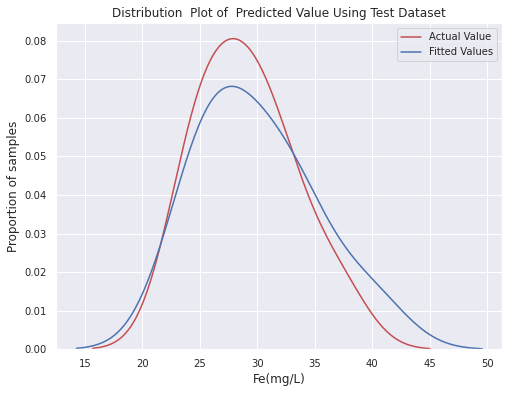

In [92]:
x1=new_df[['Fe2+','SS','Alkalinity']]
y1=y

#create train (70%) and test data set(30%)
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1= train_test_split(x1,y1,test_size=0.3, random_state=30)

#fit the model
lre = linear_model.LinearRegression()
lre.fit(x_train1, y_train1)

#obtain a prediction
y_pred1= lre.predict(x_test1)

#visualize the predicted and actual Fe concentrations with a distribution plot
plt.figure(figsize=(width, height))
ax2 = sns.distplot(y_test1, hist=False, color='r', label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Distribution  Plot of  Predicted Value Using Test Dataset', fontsize= 12)
plt.xlabel('Fe(mg/L)', fontsize= 12)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
#plt.ylim([-1.0, 8.0])
plt.legend(loc="upper right", fontsize= 10)
plt.ylabel('Proportion of samples', fontsize= 12)

plt.show()
plt.close()

#### Evaluation
Let's see the evaluation of the multiple linear regression model

In [93]:
#get different model evaluation metrics: MAE, MSE, R2-score
from sklearn.metrics import r2_score

print("Mean absolute error: %.4f" % np.mean(np.absolute(y_pred1 - y_test1)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_pred1 - y_test1) ** 2))
print("R2-score: %.4f" % r2_score(y_test1, y_pred1) )

Mean absolute error: 1.3183
Residual sum of squares (MSE): 2.6517
R2-score: 0.8308


Although, this multiple L.R model seems to perform quite well, based on the eavluation metrics, the simple LR (Fe2+ and Fe) performed better. Let'e export the predictions from the simple L.R

In [94]:
#export our predictions

x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
PredFe= x_test.index.to_frame()
PredFe['Fe_Pred']=y_pred
PredFe.reset_index(drop=True, inplace=True)
PredFe.head()
Predictions=pd.concat([x_test,y_test,PredFe], axis=1)
Predictions.drop([0], axis=1,inplace=True)
Predictions.head()

,Fe2+,Fe,Fe_Pred
0,13.0,28.2,28.979091
1,12.4,29.2,28.603944
2,13.6,28.6,29.354237
3,24.9,36.9,36.419491
4,7.9,25.1,25.790348


In [95]:
#download as CSV
def create_download_link_csv(Predictions, title="Download CSV file", filename='Predictions.csv'):
    #generate in-memory CSV, then base64-encode it
    csv=Predictions.to_csv(index=True)
    b64=base64.b64encode(csv.encode())
    payload= b64.decode()
    html= '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html= html.format(payload=payload,title=title, filename=filename)
    return HTML(html)

create_download_link_csv( Predictions, "Download my data", "FePredictions.csv")

### Conclusion
This project has revealed that Fe2+ is a major predictor of Total Fe concentration in the lagoon. Further studies should be carried out to predict Fe removal from the lagoon, with respect to the Fe and Fe2+ concentration at the inlet and outlet.